# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Very-Simple-Image-Analysis-of-Data-obtained-by-the-Cassini-Oribiter" data-toc-modified-id="Very-Simple-Image-Analysis-of-Data-obtained-by-the-Cassini-Oribiter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Very Simple Image Analysis of Data obtained by the Cassini Oribiter</a></div><div class="lev1 toc-item"><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Setup</a></div><div class="lev1 toc-item"><a href="#NASA-Cassini-ISS-Data" data-toc-modified-id="NASA-Cassini-ISS-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NASA Cassini ISS Data</a></div><div class="lev2 toc-item"><a href="#The-PDS-Imaging-Node" data-toc-modified-id="The-PDS-Imaging-Node-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The PDS Imaging Node</a></div>

<center>
<h1>Very Simple Image Analysis of Data obtained by the Cassini Oribiter</h1>
<center>by</center>
<center>Andreas Putz</center>
</center>

In [1]:
import IPython
from IPython.display import HTML, display

from __future__ import print_function

Add


# Notebook Setup

This section deals with the module imports for this notebook. This section needs to complete for the notebook to work correctly.

My anaconda setup:
* Python 3.5 environment
* Anaconda notebook extension + community notebook extensions
* conda-forge channel activated

In [2]:
import IPython
from IPython.display import HTML, display
import datetime

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import scipy as sp
import scipy.ndimage as spi
import pandas as pd

import pylab as plt
import matplotlib.mlab as mlab
from matplotlib.dates import drange, MonthLocator
%matplotlib notebook

# Modules to create nice colormaps and earth projections
try:
    from mpl_toolkits.basemap import Basemap
    import cmocean
except Exception as ex:
    print('Module basemap,cmocean not installed, please use pip or conda to install basemap and cmocean')
    print(ex)

import urllib.request
import os
import sys
import gzip
import zipfile
import shutil


try:
    import planetaryimage as pim
    from planetaryimage import PDS3Image
except Exception as ex:
    print('planetaryimage is not correctly installed. Please us pip  to install.')
    print(ex)
    
try:
    import pvl
except Exception as ex:
    print('pvl is not correctly installed. Please us pip  to install.')
    print(ex)

try:
    import plotly
    import plotly.plotly as py
    from plotly.graph_objs import *
    plotly.offline.init_notebook_mode(connected=True)
    #plotly.offline.init_notebook_mode()
    print('Plotly Version: ', plotly.__version__)
except:
    print('Plotly not installed correctly')
    
try:
    import netCDF4
except Exception as ex:
    print('netCDF4 is not correctly installed. Please us pip or conda to install.')
    print(ex)

Plotly Version:  2.0.12


In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:4000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [4]:
print('Notebook Executed:\t ' + str(datetime.datetime.now()))
print('='*80)
print('Python Version:')
print('-'*80)
print(sys.version)
print('='*80)
print('PlanetaryImaging Version:')
print('-'*80)
print(pim.__version__)
print('='*80)
print('PVL Version:')
print('-'*80)
print(pvl.__version__)
print('='*80)

Notebook Executed:	 2017-09-13 10:36:54.782920
Python Version:
--------------------------------------------------------------------------------
3.5.3 |Anaconda custom (64-bit)| (default, Mar  6 2017, 11:58:13) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
PlanetaryImaging Version:
--------------------------------------------------------------------------------
0.5.1
PVL Version:
--------------------------------------------------------------------------------
0.2.0


# NASA Cassini ISS Data

In [5]:
imloc = {}

## The PDS Imaging Node

In [6]:
filepath = os.path.join("Data", "02NASA_Cassini", "PDS_Imaging_Node")
os.makedirs(filepath,exist_ok=True)

basename = 'W1837766238_1'
imloc[basename] = {'PDSNode':{}}

try:
    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_2103/data/1837766138_1837785791/W1837766238_1.IMG',
                                                   filepath + os.sep + 'W1837766238_1.IMG')
    imloc[basename]['PDSNode']['IMG'] = mypath

    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_2103/data/1837766138_1837785791/W1837766238_1.LBL',
                                                   filepath + os.sep + 'W1837766238_1.LBL')
    imloc[basename]['PDSNode']['LBL'] = mypath
    
    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_2103/extras/browse/1837766138_1837785791/W1837766238_1.IMG.jpeg',
                                                   filepath + os.sep + 'W1837766238_1.IMG.jpeg')
    imloc[basename]['PDSNode']['JPG'] = mypath
    
    print('Download successful')
    print(imloc[basename]['PDSNode'])
      
except Exception as ex:
    print('Data cold not be retrieved !!')
    print('='*50)
    print(ex)
    print('-'*50)
    
basename = 'N1455008789_1'
imloc[basename] = {'PDSNode':{}}
try:
    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_2001/data/1454725799_1455008789/N1455008789_1.IMG',
                                                   filepath + os.sep + basename + '.IMG')
    imloc[basename]['PDSNode']['IMG'] = mypath

    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_2001/data/1454725799_1455008789/N1455008789_1.LBL',
                                                   filepath + os.sep + basename + '.LBL')
    imloc[basename]['PDSNode']['LBL'] = mypath
    
    [mypath, message] = urllib.request.urlretrieve('https://pds-imaging.jpl.nasa.gov/data/cassini/cassini_orbiter/coiss_2001/extras/browse/1454725799_1455008789/N1455008789_1.IMG.jpeg',
                                                   filepath + os.sep + basename + '.IMG.jpeg')
    imloc[basename]['PDSNode']['JPG'] = mypath
    
    print('Download successful')
    print(imloc[basename]['PDSNode'])
      
except Exception as ex:
    print('Data cold not be retrieved !!')
    print('='*50)
    print(ex)
    print('-'*50)

Download successful
{'IMG': 'Data/02NASA_Cassini/PDS_Imaging_Node/W1837766238_1.IMG', 'JPG': 'Data/02NASA_Cassini/PDS_Imaging_Node/W1837766238_1.IMG.jpeg', 'LBL': 'Data/02NASA_Cassini/PDS_Imaging_Node/W1837766238_1.LBL'}
Download successful
{'IMG': 'Data/02NASA_Cassini/PDS_Imaging_Node/N1455008789_1.IMG', 'JPG': 'Data/02NASA_Cassini/PDS_Imaging_Node/N1455008789_1.IMG.jpeg', 'LBL': 'Data/02NASA_Cassini/PDS_Imaging_Node/N1455008789_1.LBL'}


In [54]:
imdata = {}
for key, value in imloc.items():
    print('='*50)
    print('Loading PDS Imaging Node dataset ',key)
    print('-'*50)
    imdata[key] = {}
    
    print('Attempt to read PDS image: ', value['PDSNode']['LBL'])
    imdata[key]['PDSNode:PDS'] = PDS3Image.open(value['PDSNode']['LBL'])
    print('\tImage Shape: ', imdata[key]['PDSNode:PDS'].shape)
    print('\tImage dtype: ', imdata[key]['PDSNode:PDS'].dtype)
    print('\tImage range: (', imdata[key]['PDSNode:PDS'].image.min(),',',imdata[key]['PDSNode:PDS'].image.max(),')')
    
    print('Attempt to read JPG image: ', value['PDSNode']['JPG'])
    imdata[key]['PDSNode:JPG'] = spi.imread(value['PDSNode']['JPG'])
    print('\tImage Shape: ', imdata[key]['PDSNode:JPG'].shape)
    print('\tImage dtype: ', imdata[key]['PDSNode:JPG'].dtype)
    print('\tImage range: (', imdata[key]['PDSNode:JPG'].min(),',',imdata[key]['PDSNode:JPG'].max(),')')

Loading PDS Imaging Node dataset  N1455008789_1
--------------------------------------------------
Attempt to read PDS image:  Data/02NASA_Cassini/PDS_Imaging_Node/N1455008789_1.LBL
	Image Shape:  (1, 1024, 1024)
	Image dtype:  int8
	Image range: ( -128 , 127 )
Attempt to read JPG image:  Data/02NASA_Cassini/PDS_Imaging_Node/N1455008789_1.IMG.jpeg
	Image Shape:  (256, 256)
	Image dtype:  uint8
	Image range: ( 18 , 255 )
Loading PDS Imaging Node dataset  W1837766238_1
--------------------------------------------------
Attempt to read PDS image:  Data/02NASA_Cassini/PDS_Imaging_Node/W1837766238_1.LBL
	Image Shape:  (1, 512, 512)
	Image dtype:  int8
	Image range: ( -128 , 127 )
Attempt to read JPG image:  Data/02NASA_Cassini/PDS_Imaging_Node/W1837766238_1.IMG.jpeg
	Image Shape:  (256, 256)
	Image dtype:  uint8
	Image range: ( 0 , 255 )


In [56]:
imdata

{'N1455008789_1': {'PDSNode:JPG': array([[21, 22, 23, ..., 24, 24, 24],
         [21, 22, 23, ..., 24, 24, 24],
         [21, 22, 23, ..., 24, 24, 24],
         ..., 
         [22, 23, 24, ..., 25, 25, 25],
         [22, 23, 24, ..., 25, 25, 25],
         [22, 23, 24, ..., 25, 25, 25]], dtype=uint8),
  'PDSNode:PDS': Data/02NASA_Cassini/PDS_Imaging_Node/N1455008789_1.LBL},
 'W1837766238_1': {'PDSNode:JPG': array([[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ..., 
         [184, 143, 164, ...,   1,   1,   2],
         [188, 145, 168, ...,   1,   1,   2],
         [195, 150, 174, ...,   1,   1,   2]], dtype=uint8),
  'PDSNode:PDS': Data/02NASA_Cassini/PDS_Imaging_Node/W1837766238_1.LBL}}

N1455008789_1


<IPython.core.display.Javascript object>


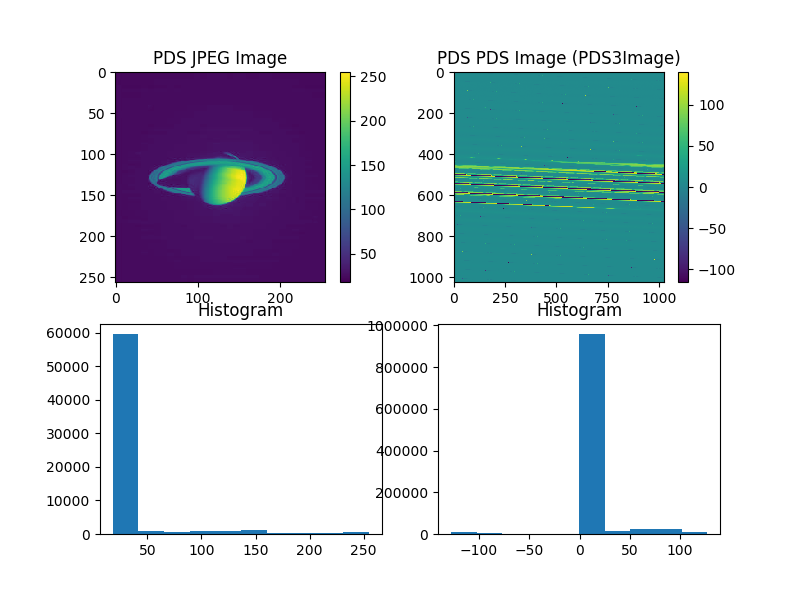

/home/andput/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/transforms.py:2786: RuntimeWarning:

overflow encountered in byte_scalars



In [74]:
key = list(imdata.keys())[0]
print(key)

plt.figure(figsize=(8,6));

plt.subplot(2,2,1)
plt.imshow(imdata[key]['PDSNode:JPG'])
plt.colorbar()
plt.title('PDS JPEG Image')

plt.subplot(2,2,3)
plt.hist(imdata[key]['PDSNode:JPG'].flatten())
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(imdata[key]['PDSNode:PDS'].image)
plt.colorbar()
plt.title('PDS PDS Image (PDS3Image)')

plt.subplot(2,2,4)
plt.hist(imdata[key]['PDSNode:PDS'].image.flatten())
plt.title('Histogram')



W1837766238_1


<IPython.core.display.Javascript object>


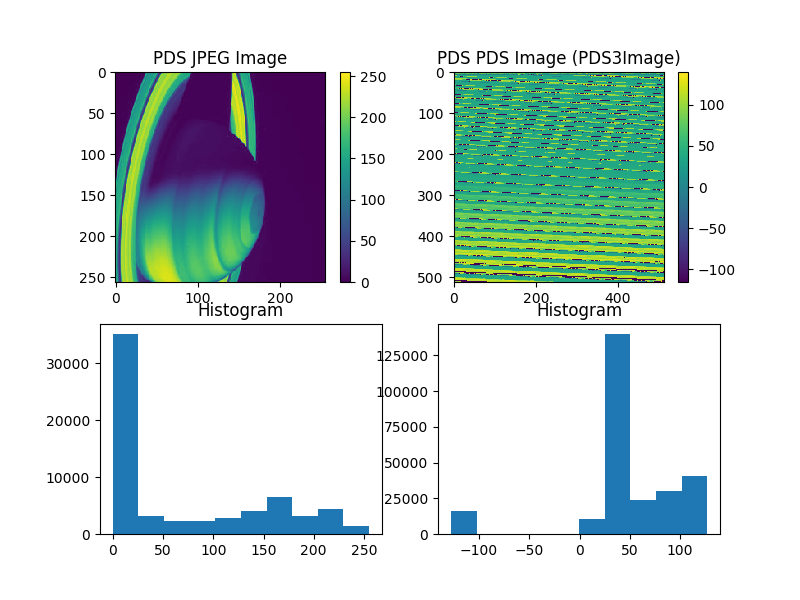

/home/andput/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/transforms.py:2786: RuntimeWarning:

overflow encountered in byte_scalars



In [75]:
key = list(imdata.keys())[1]
print(key)

plt.figure(figsize=(8,6));

plt.subplot(2,2,1)
plt.imshow(imdata[key]['PDSNode:JPG'])
plt.colorbar()
plt.title('PDS JPEG Image')

plt.subplot(2,2,3)
plt.hist(imdata[key]['PDSNode:JPG'].flatten())
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(imdata[key]['PDSNode:PDS'].image)
plt.colorbar()
plt.title('PDS PDS Image (PDS3Image)')

plt.subplot(2,2,4)
plt.hist(imdata[key]['PDSNode:PDS'].image.flatten())
plt.title('Histogram')